<a href="https://colab.research.google.com/github/anahaique/MisProyectos/blob/main/Entrega_Haique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp # customizar themes
#
import seaborn as sns
#
sns.set_theme(style = "whitegrid",palette='deep')
#
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ProyectDS_PartI_Haique

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/ProyectDS_PartI_Haique'
/content


# Análisis Predictivo del Comportamiento Transaccional y perfil demográfico sobre la Deserción de Clientes Bancarios en el uso de tarjetas de crédito.



## Presentación

La rotación de los clientes es un problema para cualquier negocio de la industria de servicios. En la industria de servicios financieros, esto generalmente toma la forma de tarjetas de crédito. Ser capaz de determinar qué clientes son los más propensos a dejar de ser clientes y, por ende, ser capaz de comunicarse con esos clientes antes de que dejen caer la tarjeta para solucionar su problema, podría darle al banco una ventaja competitiva en el mercado al mantener a más clientes usando su tarjeta de crédito sobre sus competidores.

## Hipótesis

El comportamiento transaccional del cliente (número de transacciones, monto total de transacciones, y cambio en el monto de transacciones), la utilización del crédito y las características demográficas (sexo, estado civil) son predictores significativos de la probabilidad de que un cliente deje de ser cliente.

## Razonamiento subyacente

- Un alto número de transacciones y montos transaccionados podría indicar un uso activo de la cuenta, reduciendo la probabilidad de que el cliente deje de ser cliente.
- Cambios significativos en los montos de transacciones pueden indicar variabilidad en el comportamiento del cliente, lo que podría ser un indicador de insatisfacción o problemas financieros.
- La utilización del crédito es un indicador directo de cómo el cliente maneja su crédito, lo que podría influir en su decisión de mantener la cuenta.
- Las variables demográficas pueden influir en el comportamiento financiero y la estabilidad del cliente. Por ejemplo, el estado civil puede afectar la estabilidad financiera y el sexo puede estar relacionado con diferencias en el comportamiento financiero.

Dataset Source: https://www.kaggle.com/sakshigoyal7/credit-card-customers



## Objetivo

Plantear dos estrategias:

1. Aprendizaje Supervizado: Desarrollar un modelo de machine learning utilizando regresión logística para predecir la probabilidad de que un cliente deje de ser cliente (Attrition_Flag) basándose en variables relacionadas con el comportamiento transaccional, la utilización del crédito y las características demográficas.

2. Aprendizaje no Supervizado:  Desarrollar un modelo de machine learning utilizando Análisis de Segmentación con K-means o clustering jerárquico, buscando identificar grupos de clientes con características transaccionales y demográficas similares. Esta segmentación permitirá reconocer patrones en los hábitos de consumo y el perfil de los clientes, facilitando la creación de estrategias de retención y personalización de servicios que atiendan las necesidades específicas de cada grupo.


## Indice de variables disponibles

1. **ID**: Identificador único de cada cliente (Cuantitativa).
2. **Attrition_Flag**: Estado de la cuenta del cliente (Existente o Dejó de ser cliente) (Cualitativa).
3. **Customer_Age**: Edad del cliente en años (Cuantitativa).
4. **Gender**: Género del cliente (M para masculino, F para femenino) (Cualitativa).
5. **Dependent_count**: Número de dependientes que tiene el cliente (Cuantitativa).
6. **Education_Level**: Nivel educativo del cliente (High School, Graduate, etc.) (Cualitativa).
7. **Marital_Status**: Estado civil del cliente (Married, Single, etc.) (Cualitativa).
8. **Income_Category**: Categoría de ingresos del cliente (Less than $40K, $60K - $80K, etc.) (Cualitativa).
9. **Card_Category**: Categoría de la tarjeta del cliente (Blue, Silver, etc.) (Cualitativa).
10. **Months_on_book**: Meses que el cliente ha estado con la entidad financiera (Cuantitativa).
11. **Total_Relationship_Count**: Número total de productos que tiene el cliente con la entidad (Cuantitativa).
12. **Months_Inactive_12_mon**: Número de meses que el cliente ha estado inactivo en los últimos 12 meses (Cuantitativa).
13. **Contacts_Count_12_mon**: Número de veces que el cliente ha contactado a la entidad en los últimos 12 meses (Cuantitativa).
14. **Credit_Limit**: Límite de crédito del cliente (Cuantitativa).
15. **Total_Revolving_Bal**: Saldo rotativo total del cliente (Cuantitativa).
16. **Avg_Open_To_Buy**: Promedio de crédito disponible del cliente (Cuantitativa).
17. **Total_Amt_Chng_Q4_Q1**: Cambio total en el monto transaccionado del cuarto al primer trimestre (Cuantitativa).
18. **Total_Trans_Amt**: Monto total de transacciones realizadas por el cliente (Cuantitativa).
19. **Total_Trans_Ct**: Número total de transacciones realizadas por el cliente (Cuantitativa).
20. **Total_Ct_Chng_Q4_Q1**: Cambio total en el número de transacciones del cuarto al primer trimestre (Cuantitativa).
21. **Avg_Utilization_Ratio**: Promedio de utilización del crédito del cliente (Cuantitativa).


## Los datos

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/ProyectDS_PartI_Final/bank.csv')
datos.head()

,ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,61.00
1,2,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,105.00
2,3,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.00
3,4,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.76
4,5,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.00


In [ ]:
datos.sample(5)

,ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
688,689,Existing Customer,61,M,0,Uneducated,Single,$80K - $120K,Blue,36,...,2,1,19354.0,984,18370.0,956.0,1207,32,684.00,51.00
6969,6970,Existing Customer,52,F,0,Uneducated,Married,Less than $40K,Blue,34,...,4,3,2001.0,960,1041.0,678.0,4026,86,0.83,0.48
6513,6514,Existing Customer,55,F,3,Post-Graduate,Single,$40K - $60K,Blue,46,...,3,2,5162.0,984,4178.0,842.0,3562,72,895.00,191.00
858,859,Existing Customer,44,M,0,Uneducated,Married,Less than $40K,Blue,24,...,3,0,8837.0,2103,6734.0,559.0,3753,60,875.00,238.00
2523,2524,Existing Customer,54,M,1,College,Married,$80K - $120K,Blue,48,...,1,5,12169.0,1935,10234.0,435.0,1599,38,652.00,159.00


In [ ]:
datos.shape

(10127, 21)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

La salida anterior muestra que la base no tiene datos faltantes.

In [ ]:
datos.dtypes.value_counts()

,count
int64,10
object,6
float64,5


In [ ]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10127.0,5064.000000,2923.557422,1.0,2532.50,5064.0,7595.5,10127.0
Customer_Age,10127.0,46.325960,8.016814,26.0,41.00,46.0,52.0,73.0
Dependent_count,10127.0,2.346203,1.298908,0.0,1.00,2.0,3.0,5.0
Months_on_book,10127.0,35.928409,7.986416,13.0,31.00,36.0,40.0,56.0
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.00,4.0,5.0,6.0
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.00,2.0,3.0,6.0
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.00,2.0,3.0,6.0
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.00,4549.0,11067.5,34516.0
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.00,1276.0,1784.0,2517.0
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.50,3474.0,9859.0,34516.0


In [ ]:
datos.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


## Limpieza y transformación de datos

### Duplicados

In [ ]:
datos.duplicated().sum()

0

### Nulos

In [ ]:
datos.isnull().sum()

,0
ID,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


### Outliers

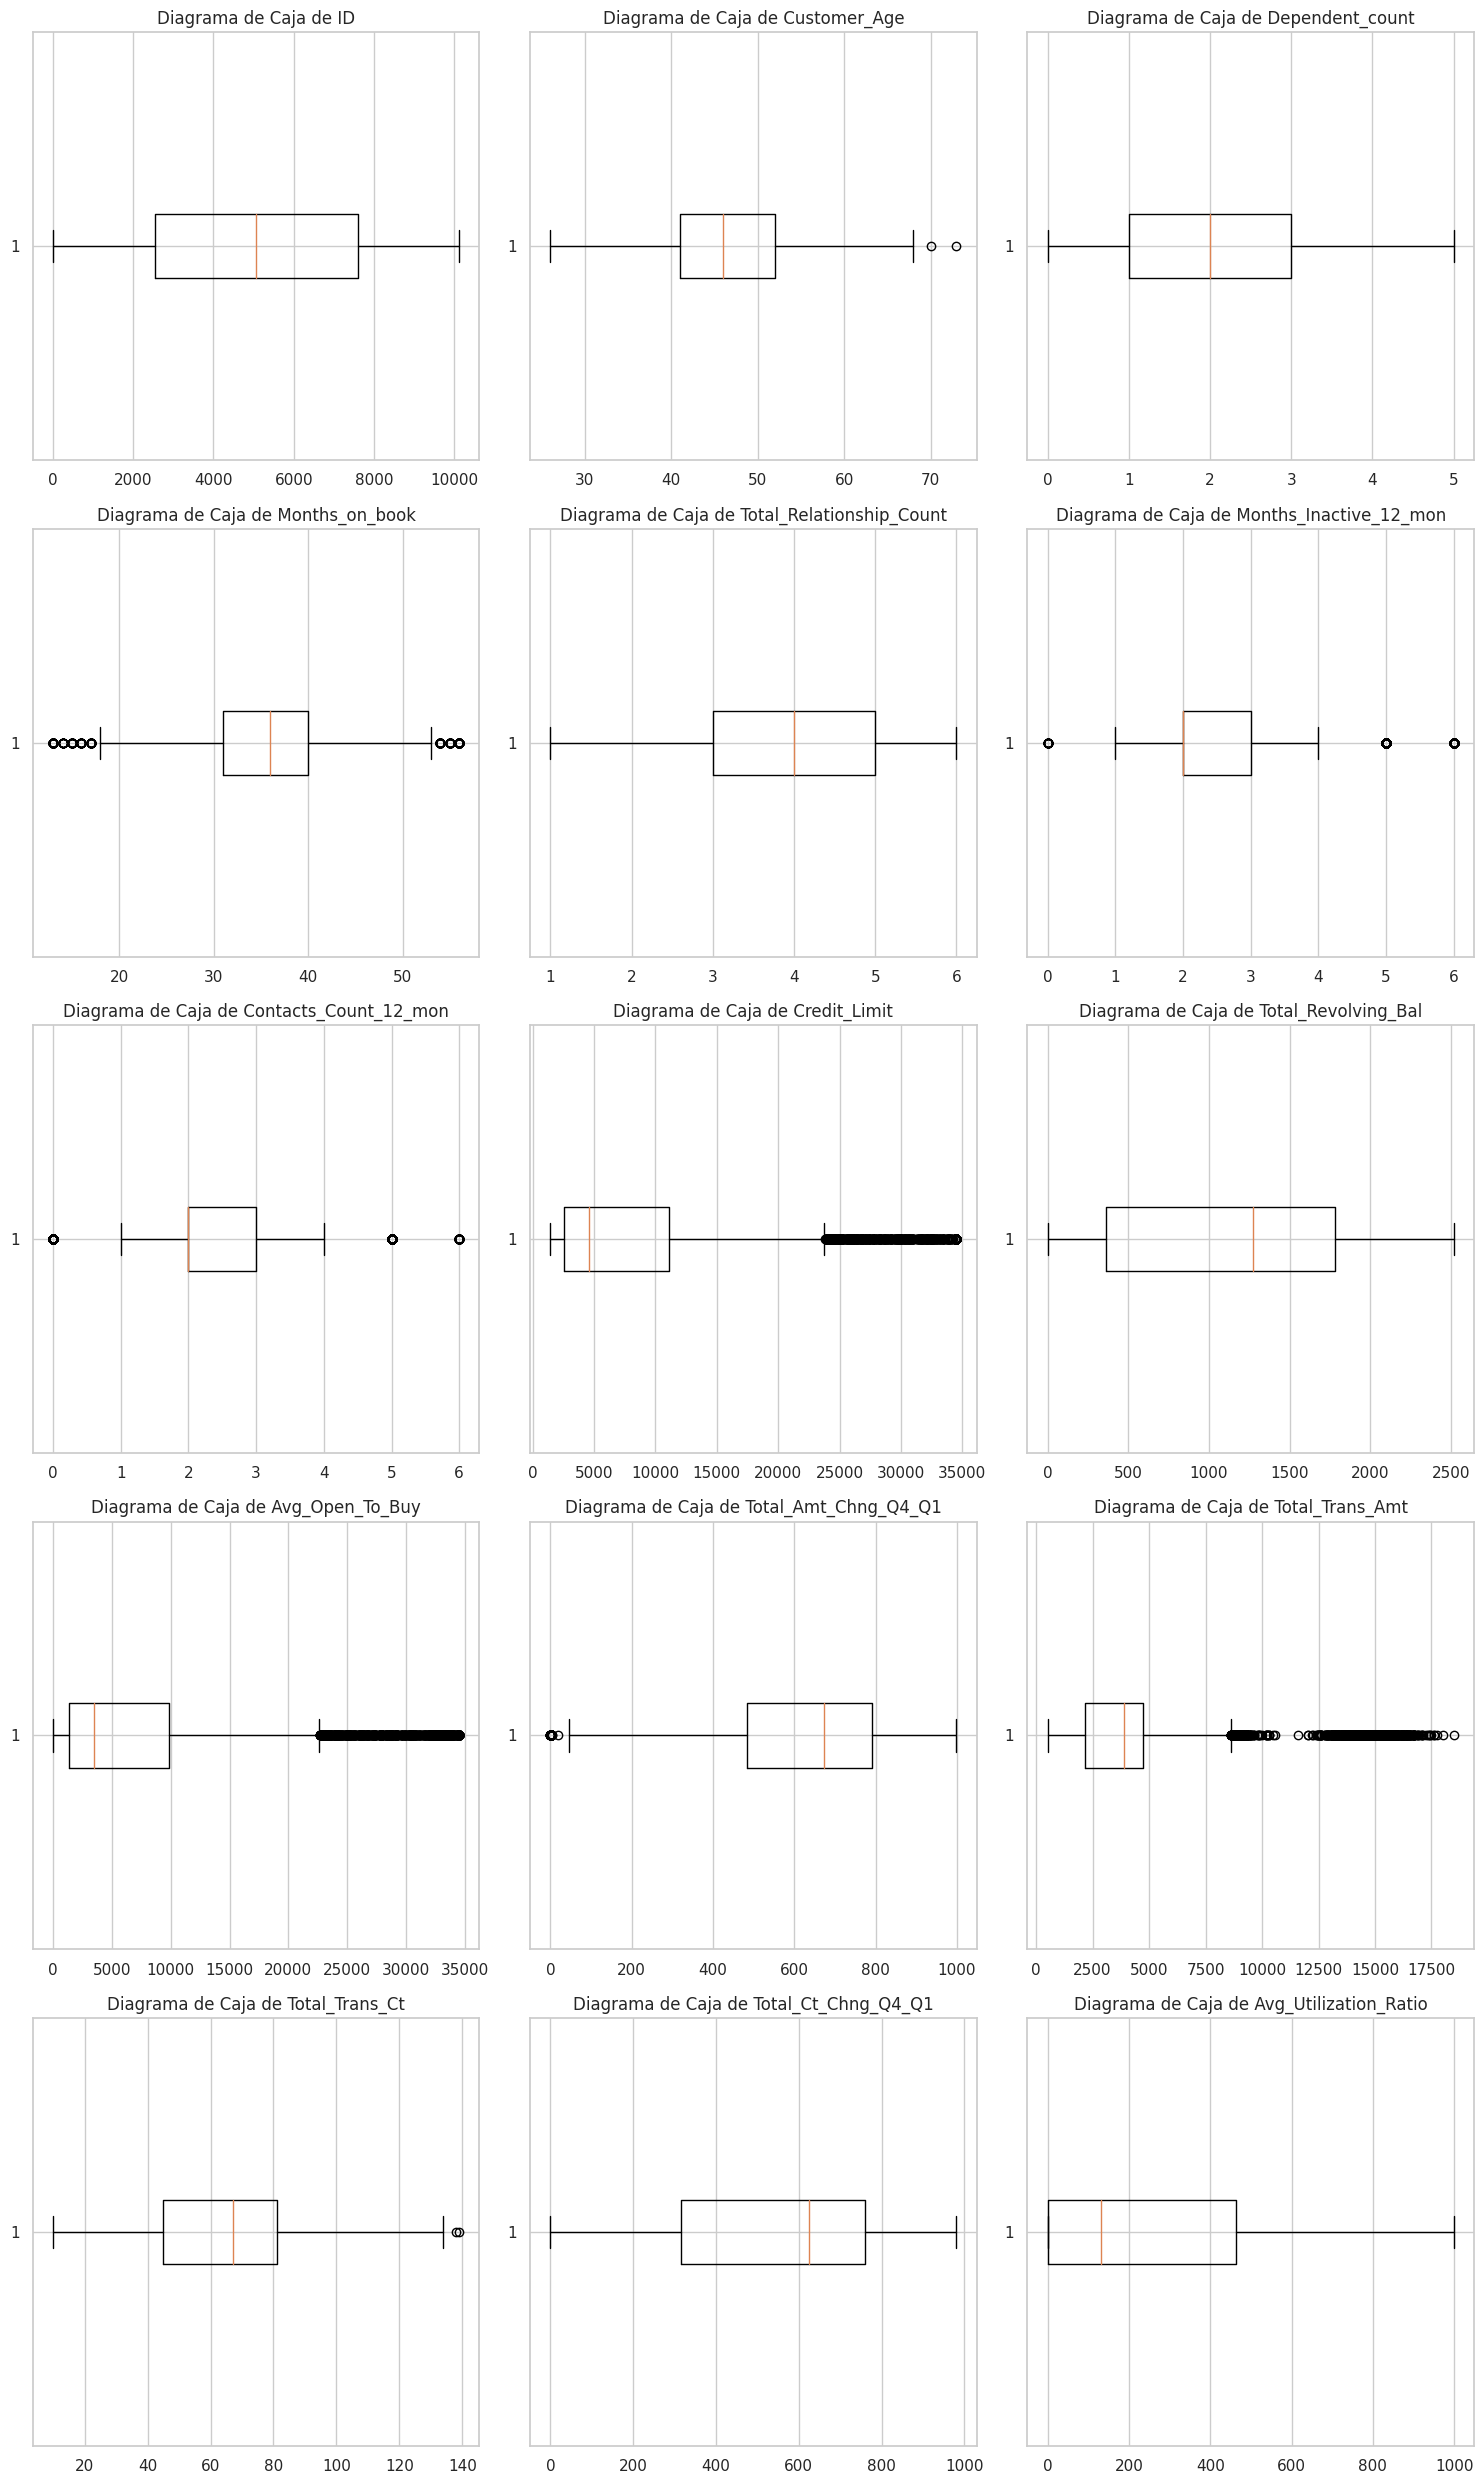

In [ ]:
numericas = datos.select_dtypes(include=['int64','float64'])
# Configuracion grilla
num_vars = len(numericas.columns)
num_rows = (num_vars//3)+(1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)
# Configuracion tamaño
plt.figure(figsize=(15, 5*num_rows))
# Generar y mostrar los diagramas de caja
for i, col in enumerate(numericas.columns):
    plt.subplot(num_rows, num_cols, i+1)
    plt.boxplot(x = datos[col],vert=False)
    plt.title("Diagrama de Caja de {}".format(col))
    plt.tight_layout()

plt.show()

Los diagramas de caja muestran que las variables:

- Credit_Limit: Límite de crédito del cliente
- Avg_Open_To_Buy: Promedio de crédito disponible del cliente
- Total_Trans_Amt: Monto total de transacciones realizadas por el cliente

Presentan un comportamiento asimétrico, con sesgo positivo o a la derecha, que implica que la mayoría de las cuentan muestras mas bien valores bajos y unas pocas, valores excesivamente altos (outliers).

El estudio trabajará inicialmente con la totaliad de los datos, incluidos los outliers

## EDA (Análisis Exploratorio de datos)

### Analisis Univariado, categóricas

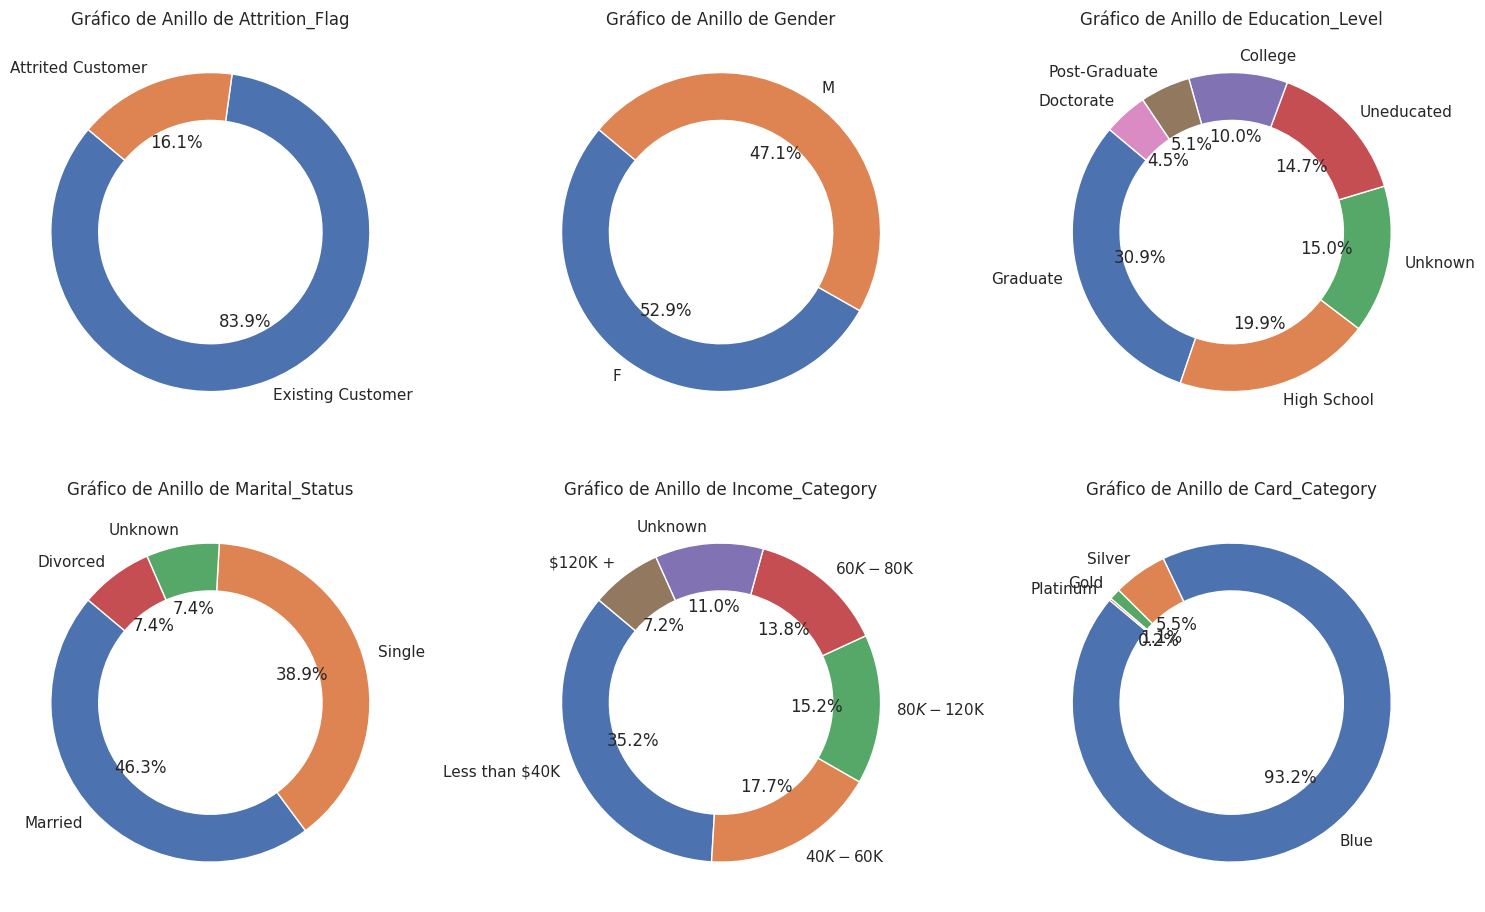

In [ ]:
# Seleccionar variables categóricas
categoricas = datos.select_dtypes(include=['object'])

# Configuración de la grilla
num_vars = len(categoricas.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)
# Configuración del tamaño de la figura
plt.figure(figsize=(15, 5 * num_rows))
# Generar y mostrar los gráficos de anillos
for i, col in enumerate(categoricas.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    counts = categoricas[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
    plt.title("Gráfico de Anillo de {}".format(col))
    plt.tight_layout()

plt.show()

### Analisis univariado, numéricas.

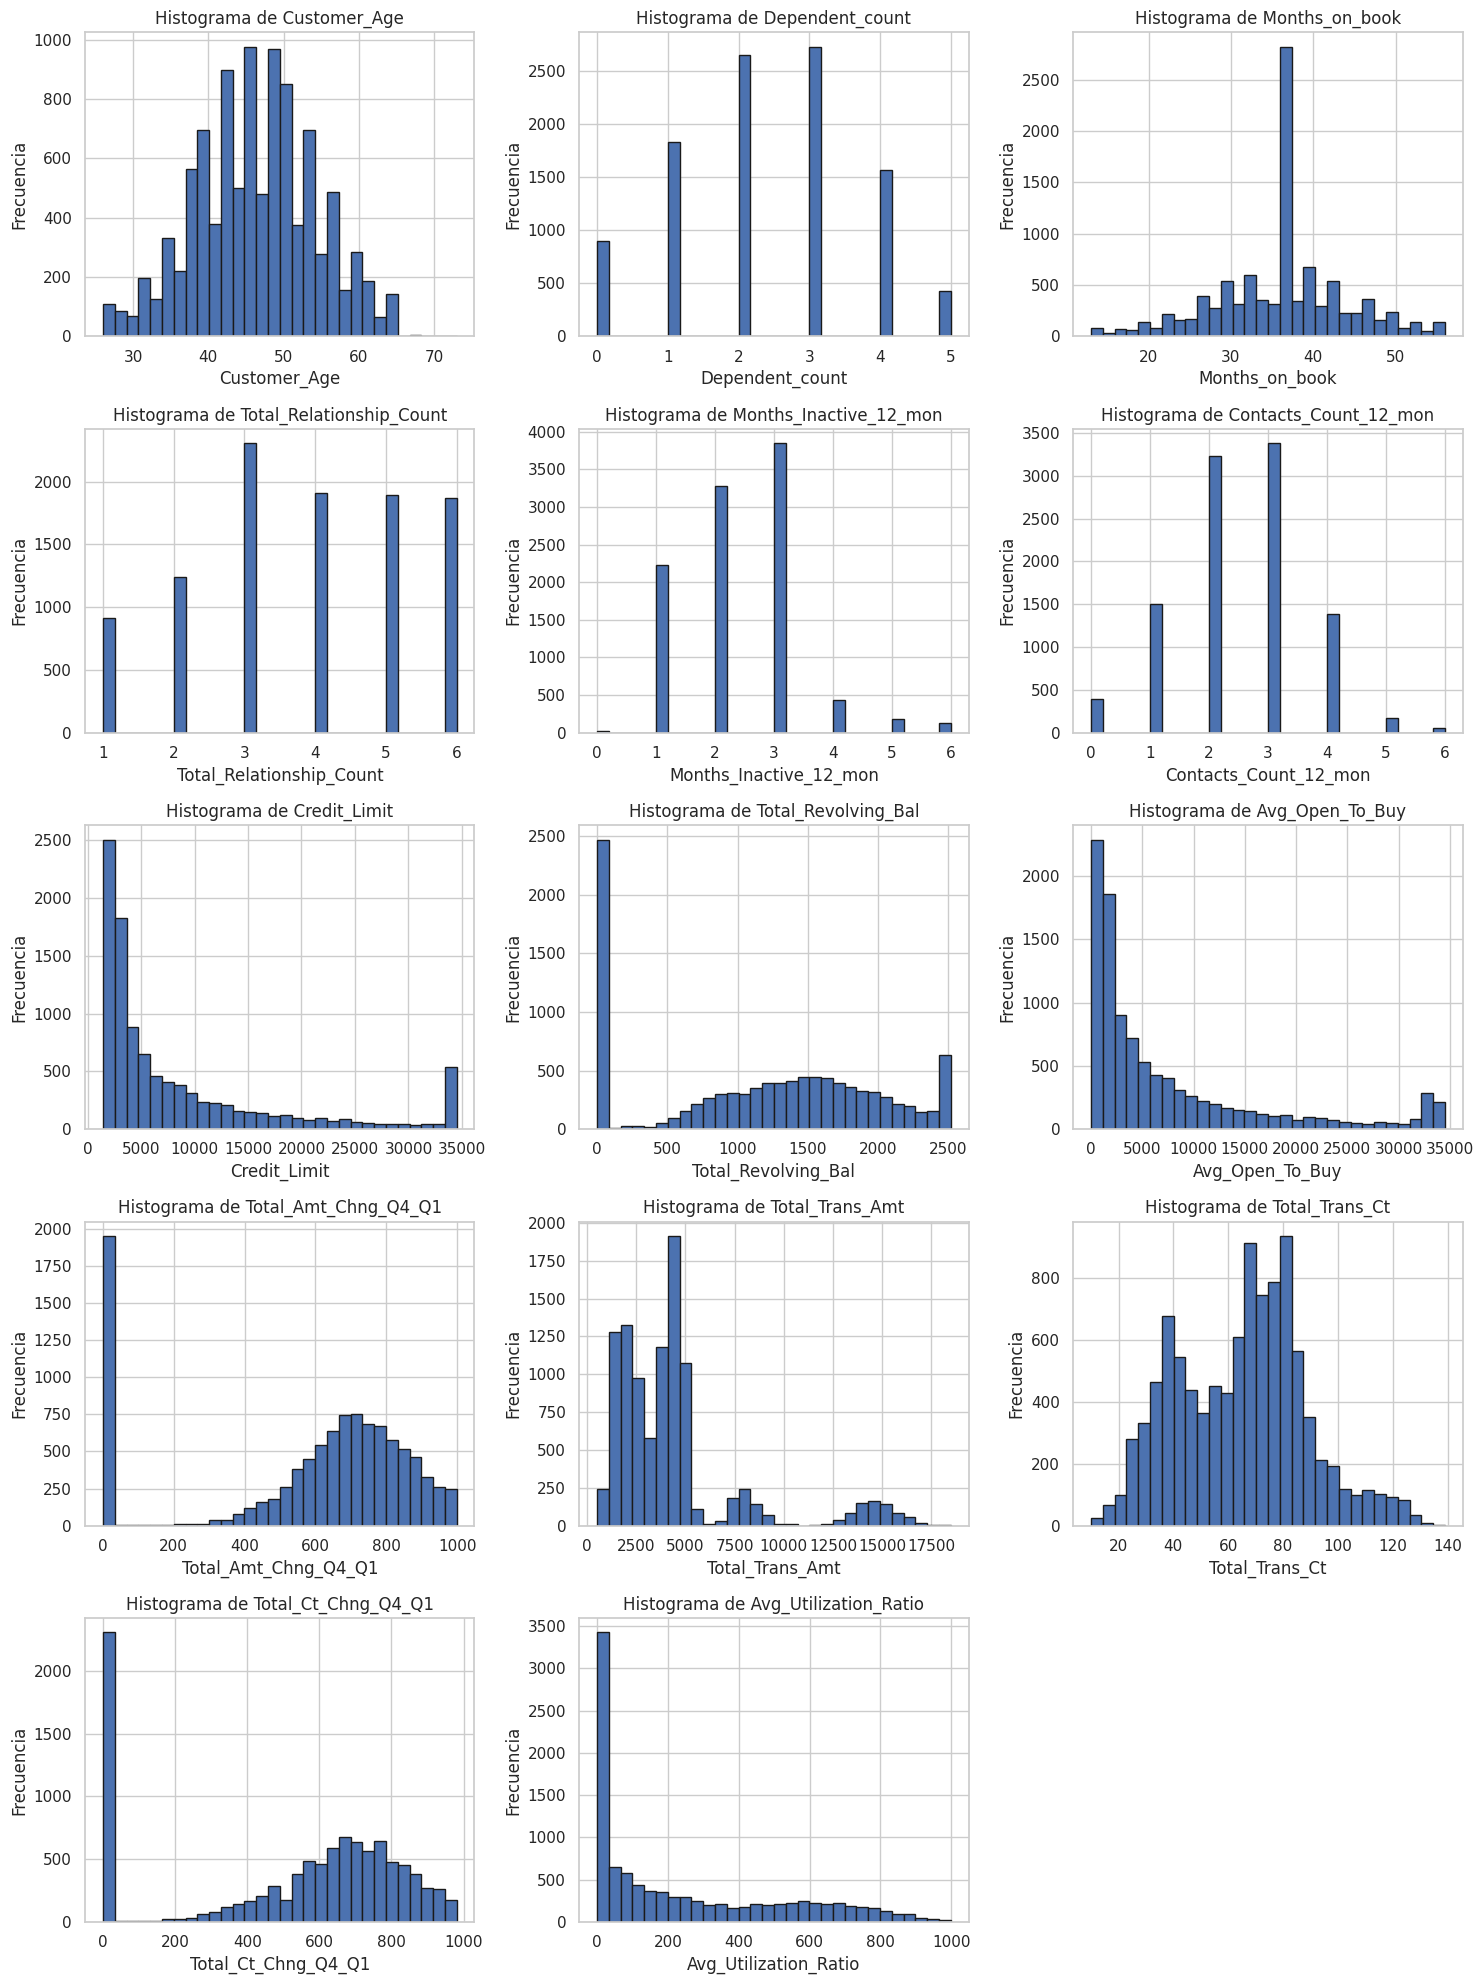

In [ ]:
numericas = datos.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])
# Configuración de la grilla
num_vars = len(numericas.columns)
num_rows = 5
num_cols = 3

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 20))

# Generar y mostrar los histogramas
for i, col in enumerate(numericas.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(numericas[col], bins=30, edgecolor='k')
    plt.title("Histograma de {}".format(col))
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()

plt.show()

Como ya se veía en los diagramas de caja, las variables `Credit_limit`, `Avg_Open_To_Buy`, `Total_Trans_Amt` y `Avg_Utilization_Ratio` muestran un comportamiento asimétrico en térmninos de sus frecuencias.
Solo la variable `Customer_Age` y en menor medida, `Month_on_book`, muestran un comportamiento que se ajusta a una _normal_.

### Análisis Multivariado

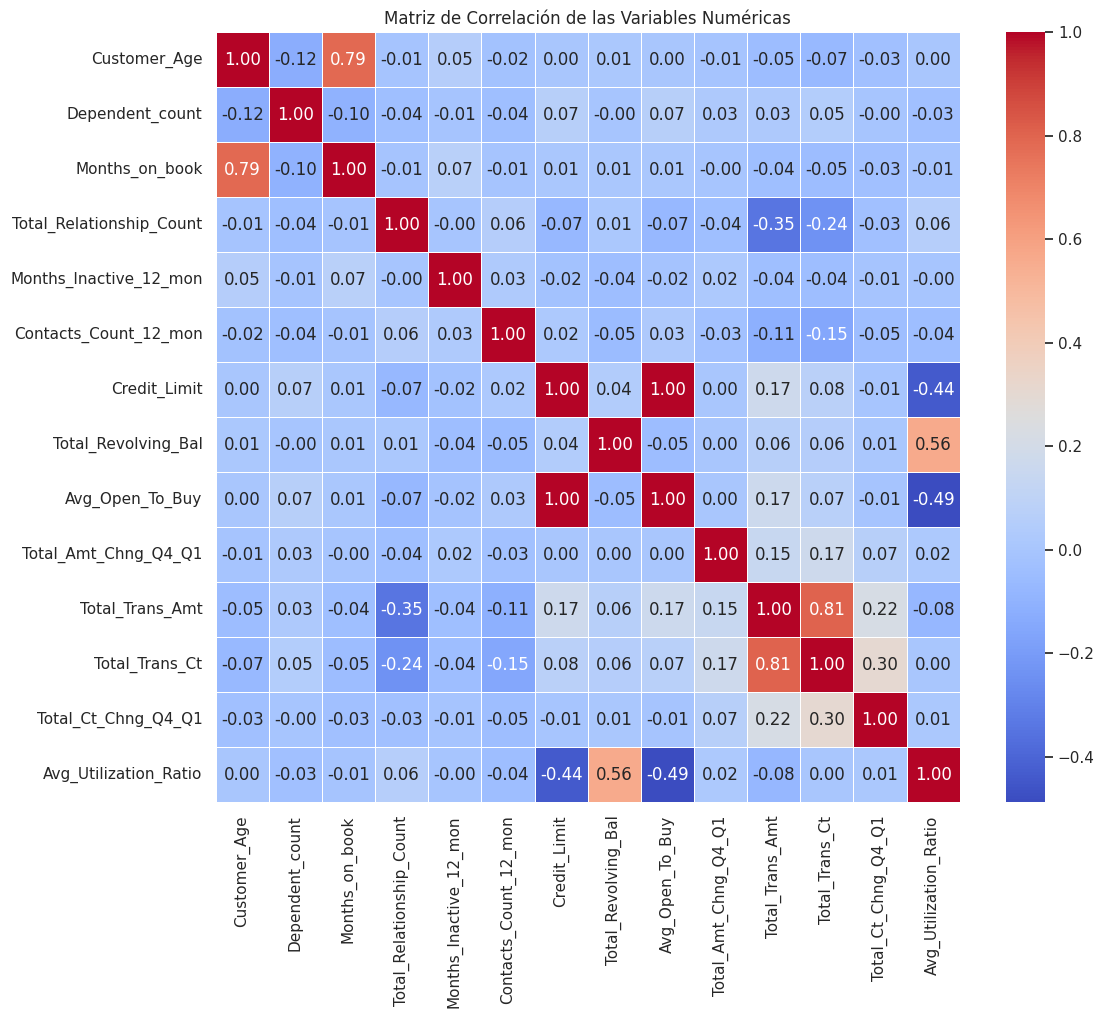

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = numericas.corr()
# Configuración del tamaño de la figura
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()




1. **Months_on_book y Customer_Age (0.79)**:
   - Existe una fuerte correlación positiva entre la edad del cliente y los meses que ha estado con la entidad financiera. Esto sugiere que los clientes de mayor edad tienden a tener una relación más larga con el banco.

2. **Total_Trans_Ct y Total_Trans_Amt (0.81)**:
   - Hay una fuerte correlación positiva entre el número total de transacciones y el monto total de transacciones. Esto indica que, en general, a medida que aumenta el número de transacciones, también lo hace el monto total transaccionado.

3. **Avg_Open_To_Buy y Credit_Limit (1.00)**:
   - Existe una correlación perfecta positiva entre el crédito disponible promedio y el límite de crédito. Esto tiene sentido ya que el crédito disponible es directamente proporcional al límite de crédito otorgado al cliente.

4. **Avg_Utilization_Ratio y Credit_Limit (-0.44)**:
   - Hay una correlación negativa moderada entre la ratio de utilización promedio y el límite de crédito. Esto sugiere que los clientes con límites de crédito más altos tienden a utilizar una menor proporción de su crédito disponible.

5. **Avg_Utilization_Ratio y Total_Revolving_Bal (0.56)**:
   - Existe una correlación positiva moderada entre la ratio de utilización promedio y el saldo rotativo total. Esto indica que los clientes con saldos rotativos más altos tienden a utilizar una mayor proporción de su crédito disponible.

6. **Total_Relationship_Count y Total_Trans_Amt (-0.35)**:
   - Hay una correlación negativa moderada entre el número total de productos que tiene el cliente con la entidad y el monto total de transacciones. Esto sugiere que los clientes con más productos pueden transaccionar menos en promedio.



## Analisis Bivariado con la variable de respuesta

### Attrition_Flag vs. Credit_Limit

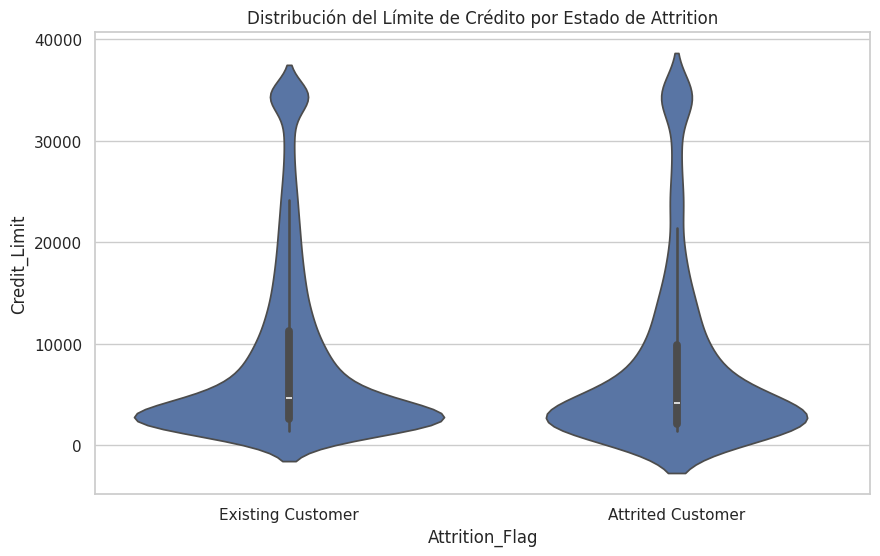

In [ ]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition_Flag', y='Credit_Limit', data=datos)
plt.title('Distribución del Límite de Crédito por Estado de Attrition')
plt.show()

La visualización sugiere que la distribución del límite de crédito es similar para ambos grupos, lo que puede indicar que el límite de crédito no es un factor determinante para que un cliente deje de ser cliente.

### Attrition_Flag vs Total_Trans_Amt

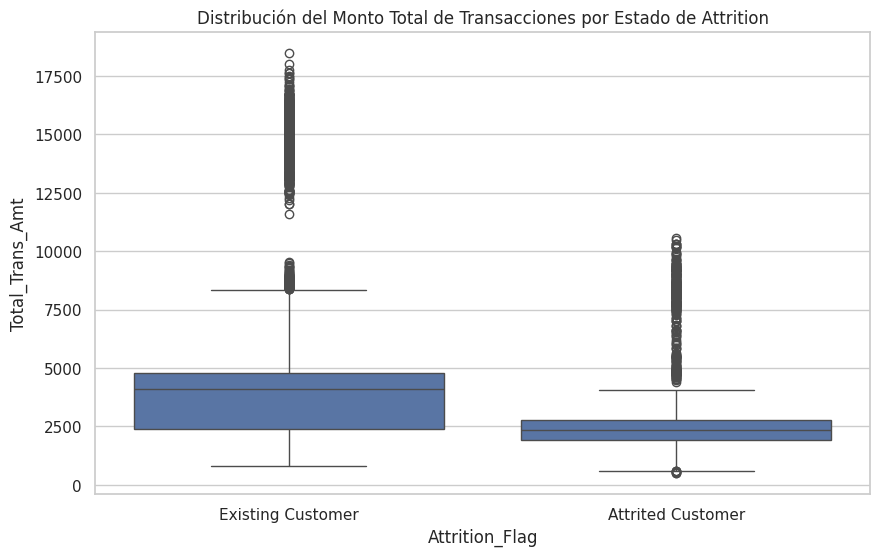

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=datos)
plt.title('Distribución del Monto Total de Transacciones por Estado de Attrition')
plt.show()

 La visualización sugiere que hay una diferencia notable en las distribuciones de Total_Trans_Amt entre los dos grupos, con los clientes que permanecen teniendo transacciones más altas en promedio en comparación con los que dejan de ser clientes.

### Comparación: Attrition_Flag vs. Education_Level

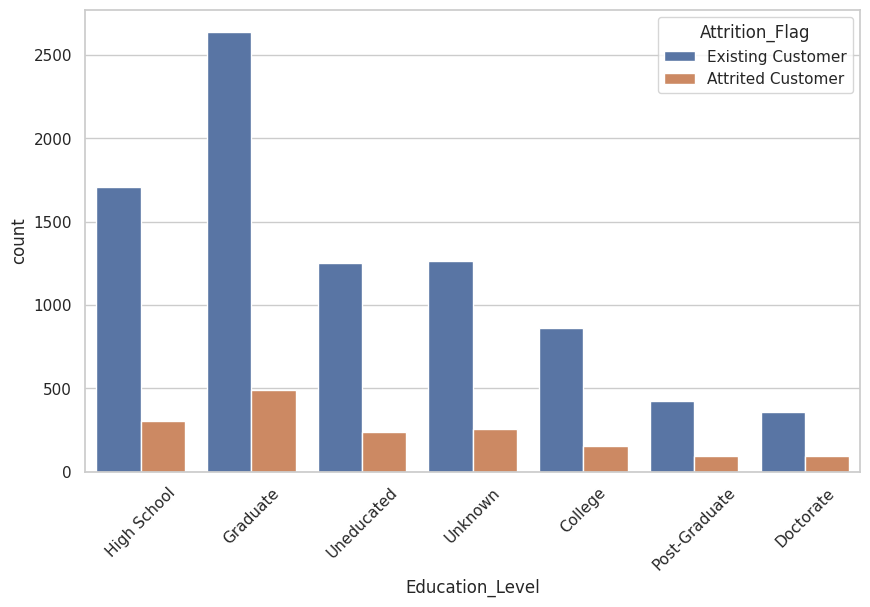

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=datos)
plt.xticks(rotation=45)
plt.show()

Comparacion: Attrition_Flag vs. Gender

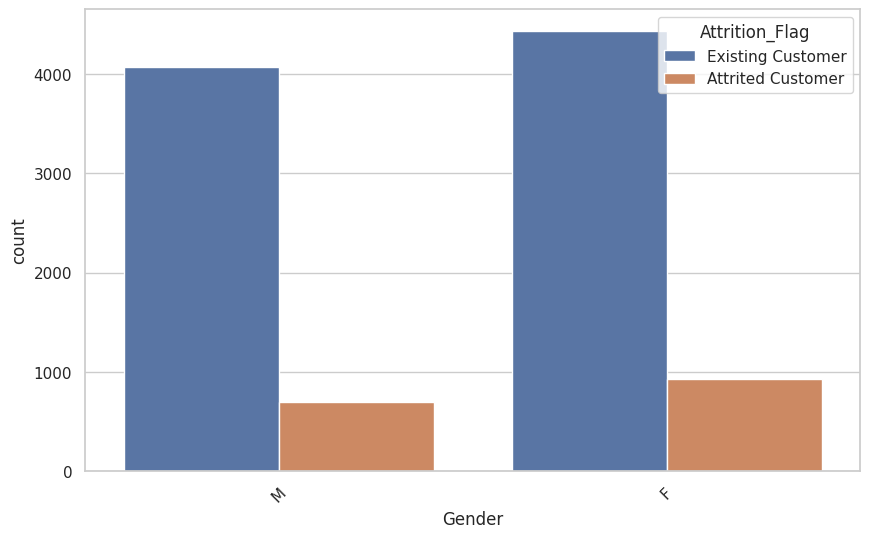

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=datos)
plt.xticks(rotation=45)
plt.show()

### Comparación: Attrition_Flag vs. Marital_Status

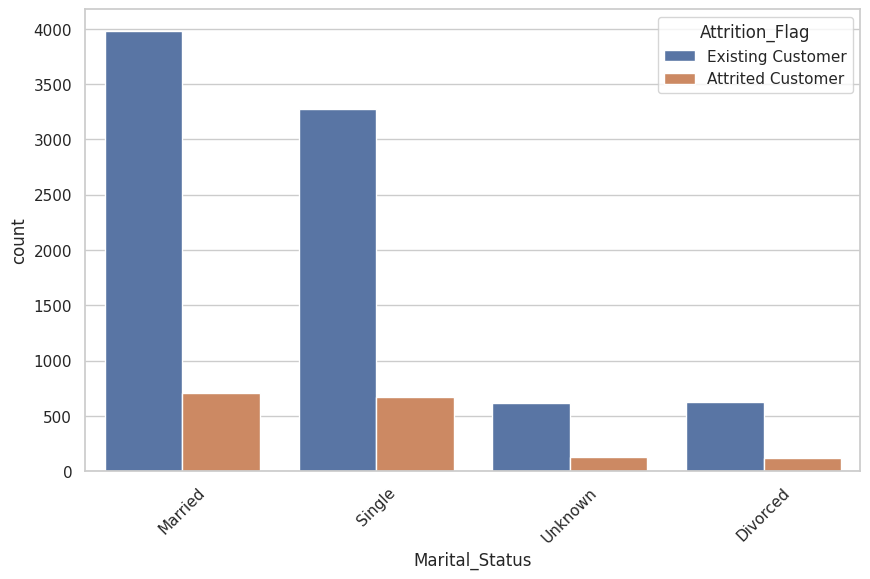

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=datos)
plt.xticks(rotation=45)
plt.show()

### Comparación: Attrition_Flag vs. Income_Category

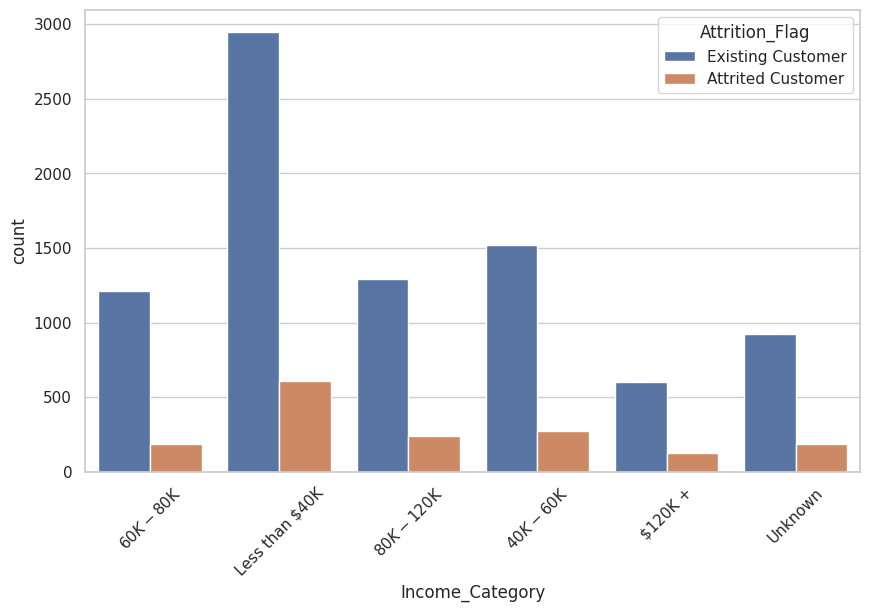

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=datos)
plt.xticks(rotation=45)
plt.show()

### Comparacion Atrittion_Flag vs Card_Category


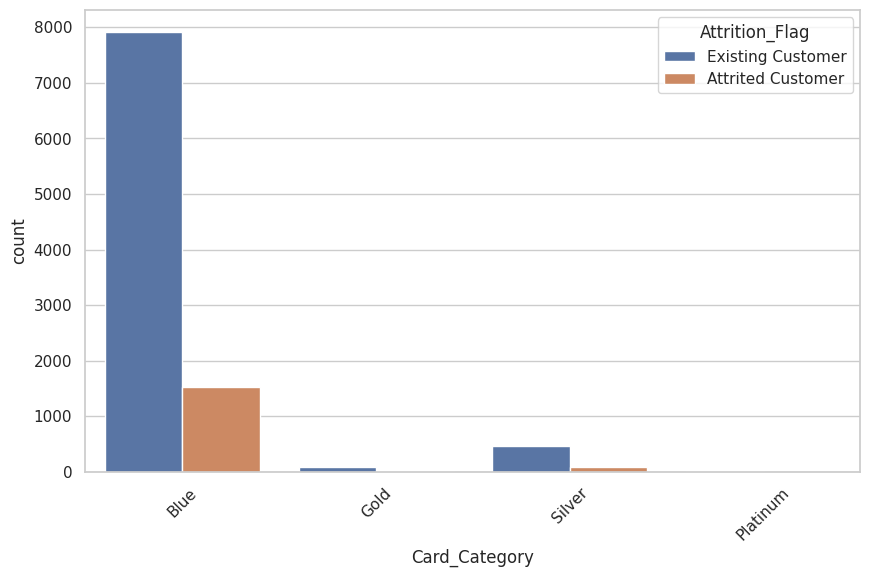

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=datos)
plt.xticks(rotation=45)
plt.show()

Los analisis realizados contra las variables categóricas disponibles, no parecen tener una diferencia significativa entre los clientes que permanecen (Existing Customer) y los que dejan de ser clientes (Attrited Customer). Ambos grupos muestran patrones similares en las distribuciones de educación, género, estado civil y nivel de ingreso.

### Pruebas de Independecia, Chi-cuadrado

Para validar las observaciones anteriores se realizan las prueba Chi-cuadrado correspondientes donde:

$H_0:$ Las variables son independientes

$H_1:$ Las variables no son independiente

In [ ]:

from scipy.stats import chi2_contingency

In [ ]:
# Prueba de chi-cuadrado para Education
contingency = pd.crosstab(datos['Education_Level'], datos['Attrition_Flag'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f'Prueba de chi-cuadrado: chi2={chi2}, p-value={p_value}')

Prueba de chi-cuadrado: chi2=12.511205404830507, p-value=0.05148913147336634


No rechaza $H_0$ al 5%, luego, La permanencia del cliente no depende de la educación.

In [ ]:
# Prueba de chi-cuadrado para Gender
contingency = pd.crosstab(datos['Gender'], datos['Attrition_Flag'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f'Prueba de chi-cuadrado: chi2={chi2}, p-value={p_value}')

Prueba de chi-cuadrado: chi2=13.86561370063734, p-value=0.00019635846717310307


Se rechaza $H_0$, luego, **La permanencia del cliente depende del genero.**

In [ ]:
# Prueba de chi-cuadrado para Marital_Status
contingency = pd.crosstab(datos['Marital_Status'], datos['Attrition_Flag'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f'Prueba de chi-cuadrado chi2={chi2}, p-value={p_value}')

Prueba de chi-cuadrado chi2=6.056097396726619, p-value=0.10891263394840227


No se rechaza $H_0$, luego, La permanencia del cliente no depende del estado civil.

In [ ]:
# Prueba de chi-cuadrado para Income_Category
contingency = pd.crosstab(datos['Income_Category'], datos['Attrition_Flag'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f'Prueba de chi-cuadrado: chi2={chi2}, p-value={p_value}')

Prueba de chi-cuadrado: chi2=12.832259274756895, p-value=0.025002425704390617


Se rechaza $H_0$, luego, La permanencia del cliente depende del nivel de ingreso. Sin embargo, no se empleará esta variable en el modelo ya que hay otras variables como `Credit_limit`, `Avg_Open_To_Buy` y `Total_Trans_Amt` se pueden decir que muestran similar aspecto del perfil del cliente.



In [ ]:
# Prueba de chi-cuadrado para Card_Category
contingency = pd.crosstab(datos['Card_Category'], datos['Attrition_Flag'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f'Prueba de chi-cuadrado: chi2={chi2}, p-value={p_value}')

Prueba de chi-cuadrado: chi2=2.2342267000046805, p-value=0.5252382797994759


No se rechaza $H_0$, luego, La permanencia del cliente no depende del tipo de tarjeta.

## Preprocesamiento

### Dummys para las categóricas relevantes

In [ ]:
# Transformar Attrition_Flag en dicotómica
datos['Attrition_Dico'] = datos['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
print(datos[['Attrition_Flag','Attrition_Dico']].tail(10))

          Attrition_Flag  Attrition_Dico
10117  Existing Customer               0
10118  Attrited Customer               1
10119  Attrited Customer               1
10120  Existing Customer               0
10121  Existing Customer               0
10122  Existing Customer               0
10123  Attrited Customer               1
10124  Attrited Customer               1
10125  Attrited Customer               1
10126  Attrited Customer               1


In [ ]:
# Gender dico
datos['Gender_Dico'] = datos['Gender'].map({'M': 0, 'F': 1})
print(datos[['Gender','Gender_Dico']].tail(10))

      Gender  Gender_Dico
10117      M            0
10118      M            0
10119      F            1
10120      M            0
10121      F            1
10122      M            0
10123      M            0
10124      F            1
10125      M            0
10126      F            1


## Reduccion de Dimensionalidad en base a la correlación

Para reducir la multicolinealidad, identificamos las variables que están altamente correlacionadas entre sí (por ejemplo, con un coeficiente de correlación mayor a 0.8) y eliminamos una de cada par de variables correlacionadas. Para esto usamos la matriz de correlación ya presentada.

1. Months_on_book y Customer_Age:
Correlación de 0.79.
Eliminamos Months_on_book porque Customer_Age puede ser más intuitivo.
1. Avg_Open_To_Buy y Credit_Limit:
Correlación de 1.00.
Eliminamos Avg_Open_To_Buy porque Credit_Limit parece ser un factor más básico e importante.
1. Total_Trans_Amt y Total_Trans_Ct:
Correlación de 0.81.
Eliminamos Total_Trans_Ct porque Total_Trans_Amt representa tanto el monto como una métrica de actividad.
1. Avg_Utilization_Ratio y Credit_Limit:
Correlación de -0.44.
Dado que hay una relación moderada y considerando que ya eliminamos Avg_Open_To_Buy por su correlación con Credit_Limit, podríamos mantener ambas por ahora.

### Feature Selection



In [ ]:

# Variable objetivo
y = datos['Attrition_Dico']
# Variables regresoras
X = datos.drop(columns=['ID','Attrition_Flag','Attrition_Dico','Gender','Income_Category',
                        'Marital_Status','Education_Level', 'Card_Category','Months_on_book','Avg_Open_To_Buy','Total_Trans_Ct'])
X.columns

Index(['Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_Dico'],
      dtype='object')

## Modelado:
## 1. Aprendizaje Supervisado: Modelo de Regresión logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# El conjunto de datos en entrenamiento y prueba con un criterio 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
# Tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (7088, 12)
Tamaño del conjunto de prueba: (3039, 12)


In [ ]:
# Objeto de regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Entrenamiento
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2543
           1       0.74      0.31      0.44       496

    accuracy                           0.87      3039
   macro avg       0.81      0.64      0.68      3039
weighted avg       0.86      0.87      0.85      3039



### Dividimos los datos para entrenamiento y testeo

[[2489   54]
 [ 343  153]]


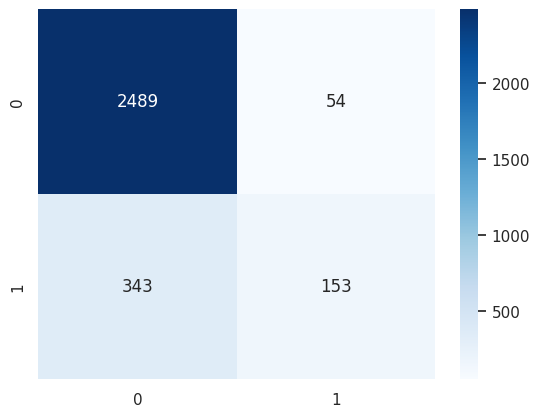

In [ ]:
# Matriz de confusion
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
g = sns.heatmap(confusion, annot=True, cmap = 'Blues',fmt='d')


### Interpretación del Reporte de Clasificación

#### Clase 0 (Existing Customer)
- **Precisión**: 0.87
  - La precisión para la clase 0 es del 87%. Esto significa que de todos los clientes que el modelo predijo que permanecerían (clase 0), el 87% realmente permanecieron.
  
- **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**: 0.98
  - El recall para la clase 0 es del 98%. Esto significa que de todos los clientes que realmente permanecieron (clase 0), el 98% fueron correctamente identificados por el modelo.

- **F1-score**: 0.92
  - El F1-score es la media armónica entre precisión y recall. Para la clase 0, es del 92%. Esto proporciona una medida equilibrada de la precisión y el recall.

- **Soporte**: 2572
  - El soporte es el número de ocurrencias reales de la clase en el conjunto de prueba. Aquí, hay 2572 clientes que realmente permanecieron (clase 0).

#### Clase 1 (Attrited Customer)
- **Precisión**: 0.67
  - La precisión para la clase 1 es del 67%. Esto significa que de todos los clientes que el modelo predijo que abandonarían (clase 1), el 67% realmente abandonaron.

- **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**: 0.19
  - El recall para la clase 1 es del 19%. Esto significa que de todos los clientes que realmente abandonaron (clase 1), solo el 19% fueron correctamente identificados por el modelo.

- **F1-score**: 0.30
  - El F1-score para la clase 1 es del 30%. Esto indica que el modelo tiene un desempeño desequilibrado y deficiente para predecir la clase de abandono.

- **Soporte**: 467
  - El soporte es el número de ocurrencias reales de la clase en el conjunto de prueba. Aquí, hay 467 clientes que realmente abandonaron (clase 1).


- **Precisión Global**: 0.86
  - La precisión global del modelo es del 86%, lo que significa que el 86% de las predicciones totales del modelo son correctas.


### Observaciones y Sugerencias

1. **Desequilibrio de Clases**:
   - La clase 1 (Attrited Customer) tiene mucho menos soporte que la clase 0 (Existing Customer). Esto puede causar que el modelo esté sesgado hacia la clase mayoritaria.

2. **Recall Bajo para la Clase 1**:
   - El recall para la clase 1 es muy bajo (19%), lo que significa que el modelo no está capturando correctamente a los clientes que abandonan.

3. **Posibles Mejoras**:

  - Aplicar alguna tecnica de seleccion de variables, que afine los resultados del modelo.


A fin de obtener mas detalle de los resultados del modelo se usará la libreria `pingouin`

In [ ]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pingouin as pg
import statsmodels.api as sm


In [ ]:
# Añadir la constante para el término independiente en la regresión
X_train_sm = sm.add_constant(X_train)
train_data = X_train_sm.copy()
train_data['Attrition_Dico'] = y_train
# Realizar la regresión logística utilizando pingouin
logit_results = pg.logistic_regression(X=train_data.drop(columns=['Attrition_Dico']), y=train_data['Attrition_Dico'])
# Mostrar el resumen del modelo
print(logit_results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


                       names          coef        se          z          pval  \
0                  Intercept -3.721154e-01  0.326738  -1.138879  2.547534e-01   
1               Customer_Age  4.609393e-03  0.004755   0.969469  3.323114e-01   
2            Dependent_count  4.201272e-02  0.029842   1.407859  1.591729e-01   
3   Total_Relationship_Count -4.708403e-01  0.027257 -17.274193  7.359512e-67   
4     Months_Inactive_12_mon  3.863560e-01  0.036582  10.561263  4.505578e-26   
5      Contacts_Count_12_mon  5.131153e-01  0.036650  14.000478  1.548262e-44   
6               Credit_Limit  3.645413e-07  0.000005   0.068539  9.453562e-01   
7        Total_Revolving_Bal -7.753084e-04  0.000065 -11.917584  9.584726e-33   
8       Total_Amt_Chng_Q4_Q1 -5.261349e-05  0.000123  -0.428693  6.681464e-01   
9            Total_Trans_Amt -2.923212e-04  0.000021 -13.788870  2.973809e-43   
10       Total_Ct_Chng_Q4_Q1 -9.236457e-04  0.000120  -7.695531  1.409079e-14   
11     Avg_Utilization_Ratio

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


### Interpretación de estos resultados

- `Customer_Age`: Coeficiente: 0.004609 y Valor p: 0.332311
- `Dependent_count`: Coeficiente: 0.042013 y Valor p: 0.159173
- `Credit_Limit`: Coeficiente: 3.645413e-07 y Valor p: 0.945356
- `Total_Amt_Chng_Q4_Q1`: Coeficiente: -5.261349e-05 y Valor p: 0.668146

Estas variables no son estadisticamente significativas por lo que se procede a quitarlas del modelo:



In [ ]:
X_train_reduced = X_train.drop(columns=['Customer_Age', 'Dependent_count', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1'])
X_test_reduced = X_test.drop(columns=['Customer_Age', 'Dependent_count', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1'])


### Modelo Reducido

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2543
           1       0.74      0.31      0.43       496

    accuracy                           0.87      3039
   macro avg       0.81      0.64      0.68      3039
weighted avg       0.86      0.87      0.85      3039

[[2490   53]
 [ 344  152]]


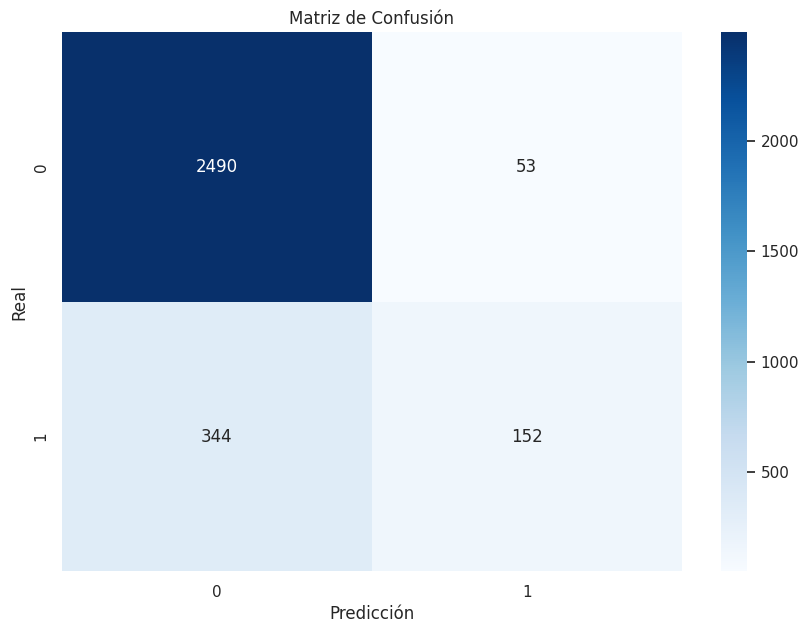

In [ ]:
# Crear y entrenar el modelo de regresión logística con las variables reducidas utilizando scikit-learn
log_reg_reduced = LogisticRegression(max_iter=1000, random_state=42)
log_reg_reduced.fit(X_train_reduced, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred_reduced = log_reg_reduced.predict(X_test_reduced)
# Generar el informe de clasificación
print(classification_report(y_test, y_pred_reduced))
# Generar la matriz de confusión
confusion_reduced = confusion_matrix(y_test, y_pred_reduced)
print(confusion_reduced)
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_reduced, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## Observaciones y Sugerencias

1. Desequilibrio de Clases:
La clase 1 (Attrited Customer) sigue teniendo menos soporte que la clase 0 (Existing Customer). Esto puede causar que el modelo esté sesgado hacia la clase mayoritaria.

2. Mejora en la Precisión y Recall para la Clase 1:
Aunque el recall para la clase 1 ha aumentado al 31% (casi el doble), aún es bajo, indicando que el modelo sigue teniendo dificultades para capturar correctamente a los clientes que abandonan. La precisión para la clase 1 ha mejorado a 74%.

3. F1-score para la Clase 1:
El F1-score para la clase 1 ha mejorado a 43%, indicando un mejor equilibrio entre precisión y recall, pero aún hay margen para mejoras.

### Posibles Mejoras:
- Manejo del Desequilibrio de Clases:

Podrías considerar técnicas de manejo de desequilibrio de clases.
- Selección de Variables:

Continuar afinando la selección de variables y considerar la interacción entre variables.
- Modelos Avanzados:

Explorar modelos más complejos que pueden capturar relaciones más complejas en los datos.

## 2. Aprendizaje No Supervisado

Dadas las conclusiones obtenidas en la primera fase del proyecto, en la que se abordó el problema definido con un modelo de regresión logística, se procede a trabajar con una estrategia diferente basada en la segmentación de clientes mediante técnicas de clustering.

continuará &#128521; ...
